# 1. DS-420 Project 1
**by Jorge Contreras**

### 2. Frame the problem and look at the big picture:

The age of abalone (a type of marine snail) is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, killing or harming the animal. Other measurements, which are easier to obtain, such as sex, length, diameter, height, and others will be used to attempt to predict their age. **Number of rings in Abalone (+1.5 to get age in years)**

**Link to dataset:** https://www.kaggle.com/rodolfomendes/abalone-dataset

In [66]:
# Common imports
import numpy as np
import pandas as pd
import sklearn as sk
import os

# Set plotting options
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 3. Read in the data, assign column names:
A total of 9 variables, however, **"Rings"** is my label variable and will change it to age (by adding 1.5)

In [67]:
abalones = pd.read_csv ("abalone.csv")
abalones.rename(columns = {"Sex":"sex", "Length":"length", "Diameter":"diameter","Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

abalones['age'] = abalones['rings'] + 1.5
abalones.drop('rings', axis = 1, inplace = True)
print (abalones.shape)  # Shows number of rows and columns
pd.DataFrame.head (abalones)

(4177, 9)


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### 4. Explore the data:
**A1. Histograms of variables (quantitative):**

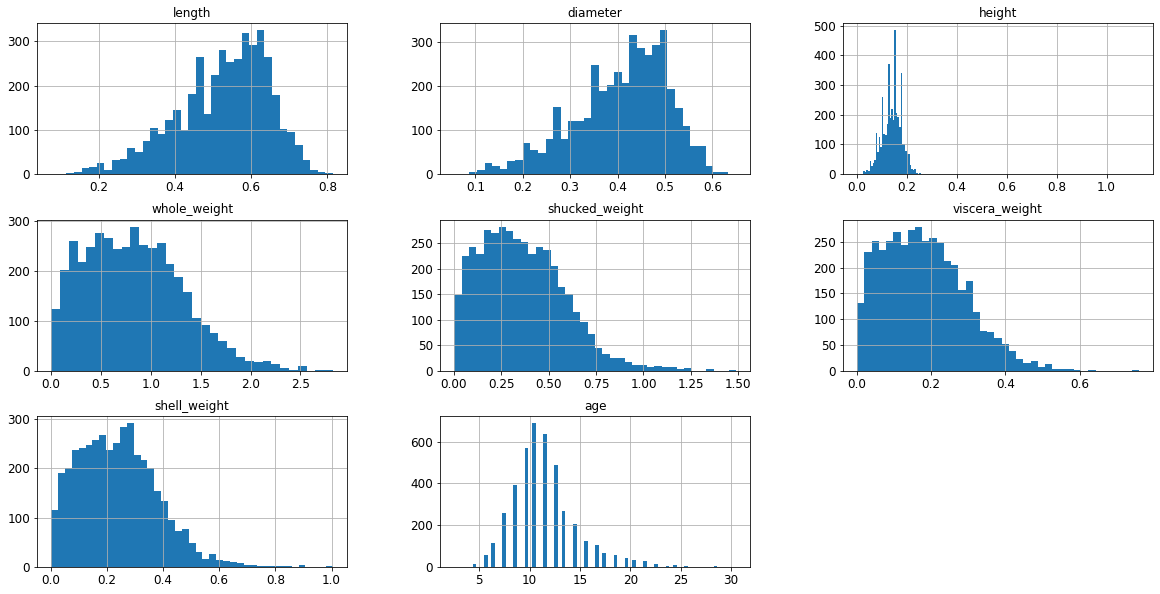

In [68]:
abalones.hist (bins='auto', figsize=(20,10))   
plt.show()

**A2. Frequency table for the qualitative varibale:**

In [69]:
np.unique(abalones["sex"],return_counts=True)

(array(['F', 'I', 'M'], dtype=object), array([1307, 1342, 1528]))

**B. Extent of missing data:** <br>
No need to impute. There is no missing data as we can see in the following table:

In [70]:
abalones.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**C. Do missing value imputation:** <br>
Again, not neccesary. Let's look at the count just to be sure:

In [71]:
abalones.count()

sex               4177
length            4177
diameter          4177
height            4177
whole_weight      4177
shucked_weight    4177
viscera_weight    4177
shell_weight      4177
age               4177
dtype: int64

**D. At a first glance none of the the histograms show extreme skewness and therefore require no transformation:**

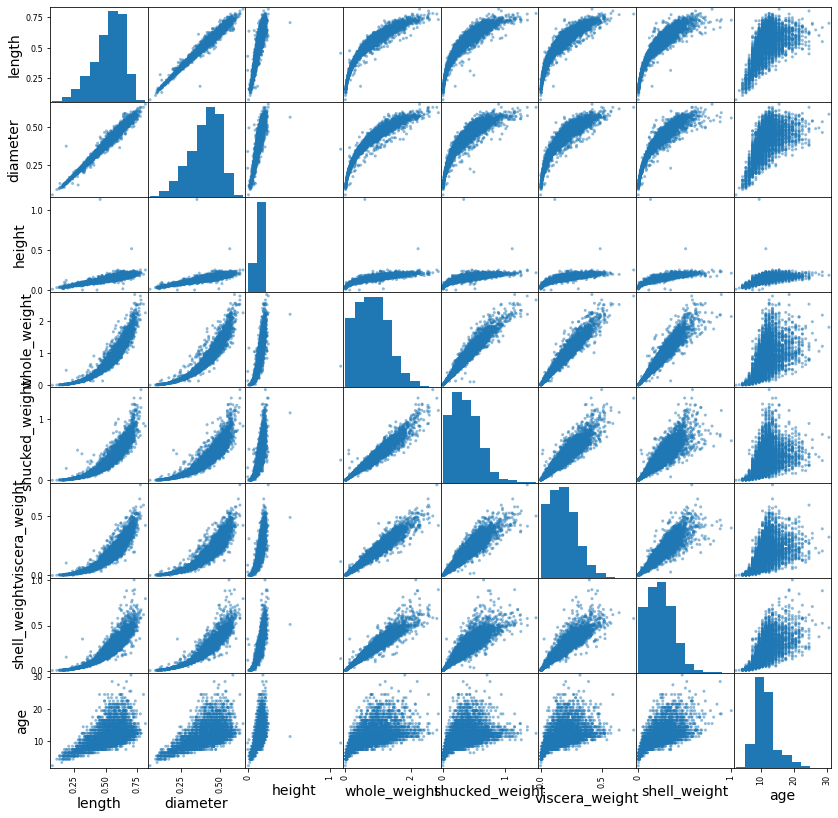

In [72]:
pd.plotting.scatter_matrix(abalones, figsize=(14,14))
plt.show()

**Notice the minimum value for height is zero:**

In [73]:
abalones[abalones['height'] == 0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


**Therefore these rows will be excluded:**

In [74]:
abalones.drop(index=[1257,3996], inplace = True)

**Checking skewness again:**

In [75]:
abalones.skew().sort_values(ascending = False)

height            3.166364
age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
diameter         -0.610182
length           -0.640993
dtype: float64

**Using square root transformation on the height as it has a high skewness:**

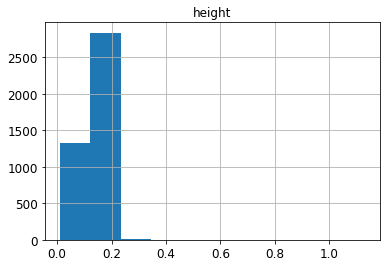

In [76]:
abalones.hist(column="height")
plt.show()
abalones['height'] = np.sqrt(abalones['height'])

**Checking skewness one last time:**

In [77]:
abalones.skew().sort_values(ascending = False)

age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
height           -0.176012
diameter         -0.610182
length           -0.640993
dtype: float64

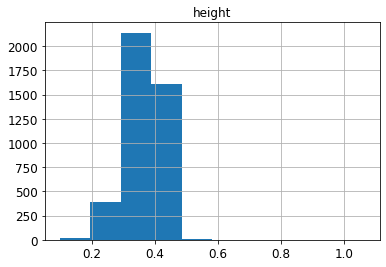

In [78]:
abalones.hist(column="height")
plt.show()

**Checking correlation: no negative correlation found**


In [79]:
corr_matrix = abalones.corr()
corr_matrix["age"].sort_values(ascending=False)

age               1.000000
shell_weight      0.627928
height            0.596076
diameter          0.574418
length            0.556464
whole_weight      0.540151
viscera_weight    0.503562
shucked_weight    0.420597
Name: age, dtype: float64

**shell_weight shows high correlation with age:**

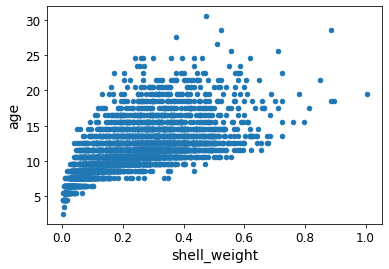

In [80]:
abalones.plot(kind="scatter", x="shell_weight", y="age")
plt.show()

In [81]:
pd.DataFrame (abalones["shell_weight"])

,shell_weight
0,0.1500
1,0.0700
2,0.2100
3,0.1550
4,0.0550
...,...
4172,0.2490
4173,0.2605
4174,0.3080
4175,0.2960


### 5. Prepare the data:

**Create a matrix of features (X: independant variables) and a dependant variable (Y):**

In [82]:
X = abalones.iloc[:, :-1].values
y = abalones.iloc[:, -1].values

In [83]:
print(X)
type(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


numpy.ndarray

In [84]:
print(y)
type(y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


numpy.ndarray

**Encoding categorical data: Sex (first column) will be categorised by males and females only. This data will be changed into binary vectors. The dummy variable trap will be dealt with by dropping the first column:**

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop = 'first'), [0])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

In [86]:
print(X)
type(X)

[[0.0 1.0 0.455 ... 0.2245 0.101 0.15]
 [0.0 1.0 0.35 ... 0.0995 0.0485 0.07]
 [0.0 0.0 0.53 ... 0.2565 0.1415 0.21]
 ...
 [0.0 1.0 0.6 ... 0.5255 0.2875 0.308]
 [0.0 0.0 0.625 ... 0.531 0.261 0.296]
 [0.0 1.0 0.71 ... 0.9455 0.3765 0.495]]


numpy.ndarray

In [87]:
print(pd.DataFrame(X))

        0    1      2      3         4       5       6       7       8
0     0.0  1.0  0.455  0.365  0.308221   0.514  0.2245   0.101    0.15
1     0.0  1.0   0.35  0.265       0.3  0.2255  0.0995  0.0485    0.07
2     0.0  0.0   0.53   0.42  0.367423   0.677  0.2565  0.1415    0.21
3     0.0  1.0   0.44  0.365  0.353553   0.516  0.2155   0.114   0.155
4     1.0  0.0   0.33  0.255  0.282843   0.205  0.0895  0.0395   0.055
...   ...  ...    ...    ...       ...     ...     ...     ...     ...
4170  0.0  0.0  0.565   0.45  0.406202   0.887    0.37   0.239   0.249
4171  0.0  1.0   0.59   0.44  0.367423   0.966   0.439  0.2145  0.2605
4172  0.0  1.0    0.6  0.475  0.452769   1.176  0.5255  0.2875   0.308
4173  0.0  0.0  0.625  0.485  0.387298  1.0945   0.531   0.261   0.296
4174  0.0  1.0   0.71  0.555  0.441588  1.9485  0.9455  0.3765   0.495

[4175 rows x 9 columns]


### 6. Fit and asses an initial SVM model and an initial random forest model using the training set

**A. Divide the data at random into training (80%) and validation (20%) sets**

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**SVR Model:**

In [89]:
from sklearn.svm import SVR

svr_ab = SVR(kernel="rbf", degree=3, C=100, epsilon=0.1)
svr_ab.fit(X_train, y_train)

SVR(C=100)

In [90]:
from sklearn.metrics import mean_squared_error

tr_predictions = svr_ab.predict(X_train)
svr_mse = mean_squared_error(y_train, tr_predictions)
svr_rmse = np.sqrt(svr_mse)
print(f"The Root Mean Square Error is {svr_rmse:.2f}")

The Root Mean Square Error is 2.06


In [91]:
tst_predictions = svr_ab.predict(X_test)
svr_mse = mean_squared_error(y_test, tst_predictions)
svr_rmse = np.sqrt(svr_mse)
print(f"The Root Mean Square Error is {svr_rmse:.2f}")

The Root Mean Square Error is 2.17


In [92]:
from sklearn.metrics import r2_score
svr_r2 = r2_score(y_train, tr_predictions)
print(f"The R2 Score is {svr_r2:.2f}")

The R2 Score is 0.58


In [93]:
svr_r2 = r2_score(y_test, tst_predictions)
print(f"The R2 Score is {svr_r2:.2f}")

The R2 Score is 0.59


In [94]:
data = X_test[:5]
labels = y_test[:5]

print("Predictions:" ,svr_ab.predict(data))
print("Labels:", list(labels))

Predictions: [15.25354677  9.16693683  8.43285334 10.91162591 11.17033998]
Labels: [16.5, 8.5, 12.5, 12.5, 10.5]


**Diagnostic plots:**

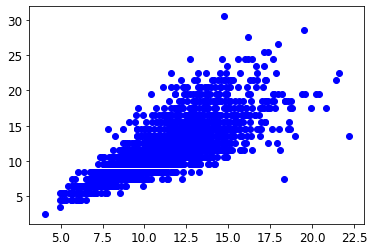

In [95]:
plt.plot(tr_predictions, y_train, "bo")
plt.show()

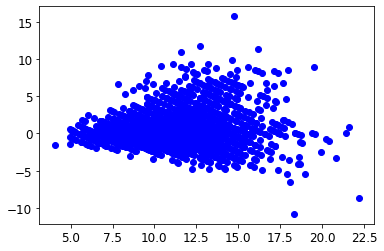

In [96]:
tr_resid = (y_train - tr_predictions)
plt.plot(tr_predictions, tr_resid, "bo")
plt.show()

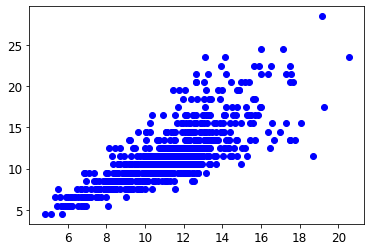

In [97]:
plt.plot(tst_predictions, y_test, "bo")
plt.show()

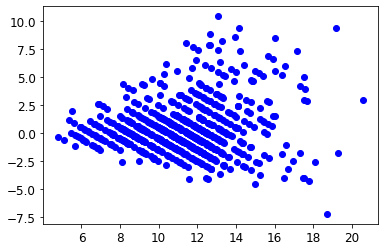

In [98]:
tst_resid = (y_test - tst_predictions)
plt.plot(tst_predictions, tst_resid, "bo")
plt.show()

**RFR Model:**

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=400)

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error

tr_predictions = regressor.predict(X_train)
rfr_mse = mean_squared_error(y_train, tr_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.80


In [102]:
tst_predictions = regressor.predict(X_test)
rfr_mse = mean_squared_error(y_test, tst_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.83


In [103]:
from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_train, tr_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [104]:
rfr_r2 = r2_score(y_test, tst_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [105]:
rf_data = y_pred[:7]
rf_labels = y_test[:7]

print("Predictions:" ,rf_data)
print("Labels:", list(rf_labels))

Predictions: [16.66    9.33   10.9975 11.9525 11.26   10.43   12.35  ]
Labels: [16.5, 8.5, 12.5, 12.5, 10.5, 10.5, 12.5]


**Diagnostic plots:**

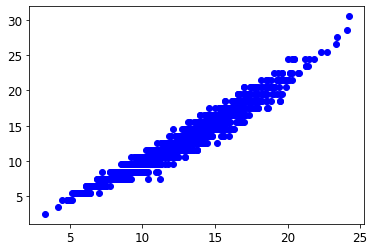

In [106]:
plt.plot(tr_predictions, y_train, "bo")
plt.show()

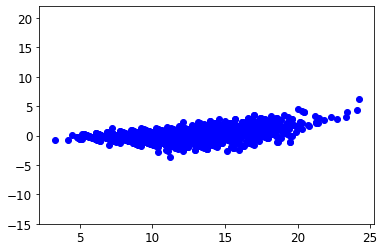

In [107]:
tr_resid = (y_train - tr_predictions)
plt.ylim(-15,22)
plt.plot(tr_predictions, tr_resid, "bo")
plt.show()

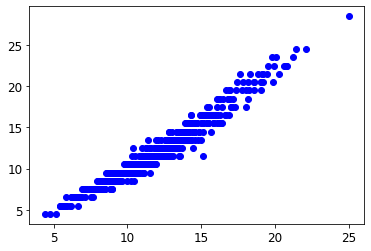

In [108]:
plt.plot(tst_predictions, y_test, "bo")
plt.show()

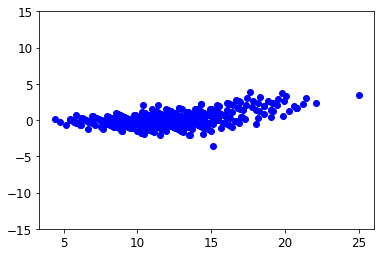

In [109]:
tst_resid = (y_test - tst_predictions)
plt.ylim(-15,15)
plt.plot(tst_predictions, tst_resid, "bo")
plt.show()

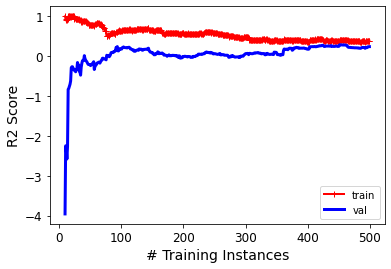

In [110]:
def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_prec, val_prec = [], []
    for m in range(10, 500):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_prec.append(score_fun(y_train_predict, y_train[:m]))
        val_prec.append(score_fun(y_val_predict, y_val))
        
    plt.plot(np.arange (10, m+1), train_prec, "r-+", linewidth=2, label="train")
    plt.plot(np.arange (10, m+1), val_prec, "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel ("# Training Instances")
    plt.ylabel (score_label)
    
plot_learning_curves(svr_ab, X, y, r2_score, "R2 Score")

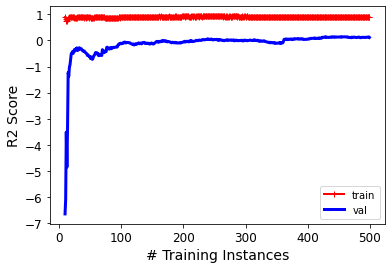

In [111]:
plot_learning_curves(regressor, X, y, r2_score, "R2 Score")

In [112]:
regressor = RandomForestRegressor(n_estimators = 500)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=500)

In [113]:
y_pred = regressor.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error

tr_predictions = regressor.predict(X_train)
rfr_mse = mean_squared_error(y_train, tr_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.79


In [115]:
tst_predictions = regressor.predict(X_test)
rfr_mse = mean_squared_error(y_test, tst_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.82


In [116]:
from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_train, tr_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [117]:
rfr_r2 = r2_score(y_test, tst_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [118]:
regressor = RandomForestRegressor(n_estimators = 200)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=200)

In [119]:
y_pred = regressor.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error

tr_predictions = regressor.predict(X_train)
rfr_mse = mean_squared_error(y_train, tr_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.80


In [121]:
tst_predictions = regressor.predict(X_test)
rfr_mse = mean_squared_error(y_test, tst_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 0.82


In [122]:
from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_train, tr_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [123]:
rfr_r2 = r2_score(y_test, tst_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.94


In [124]:
regressor = RandomForestRegressor(n_estimators = 500, max_depth=10)
regressor.fit(X, y)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [125]:
y_pred = regressor.predict(X_test)

In [126]:
tr_predictions = regressor.predict(X_train)
rfr_mse = mean_squared_error(y_train, tr_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 1.34


In [127]:
tst_predictions = regressor.predict(X_test)
rfr_mse = mean_squared_error(y_test, tst_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The Root Mean Square Error is {rfr_rmse:.2f}")

The Root Mean Square Error is 1.43


In [128]:
from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_train, tr_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.82


In [129]:
rfr_r2 = r2_score(y_test, tst_predictions)
print(f"The R2 Score is {rfr_r2:.2f}")

The R2 Score is 0.82
